In [97]:
# Modelos de Machine Learning para Regressao:

# 1 - Regressao Linear
# 2 - Arvore de Decisao
# 3 - Random Forest

# Proposta de Negocio: Previsao de Preco de novos imoveis da empresa AluraAndar
# Devemos avaliar os nossos dados e analisar com cuidado as decisoes a serem tomadas, pois apenas analisando, conseguimos aplicar as devidas transformacoes e causando um impato melhor no modelo.

![image.png](
  
)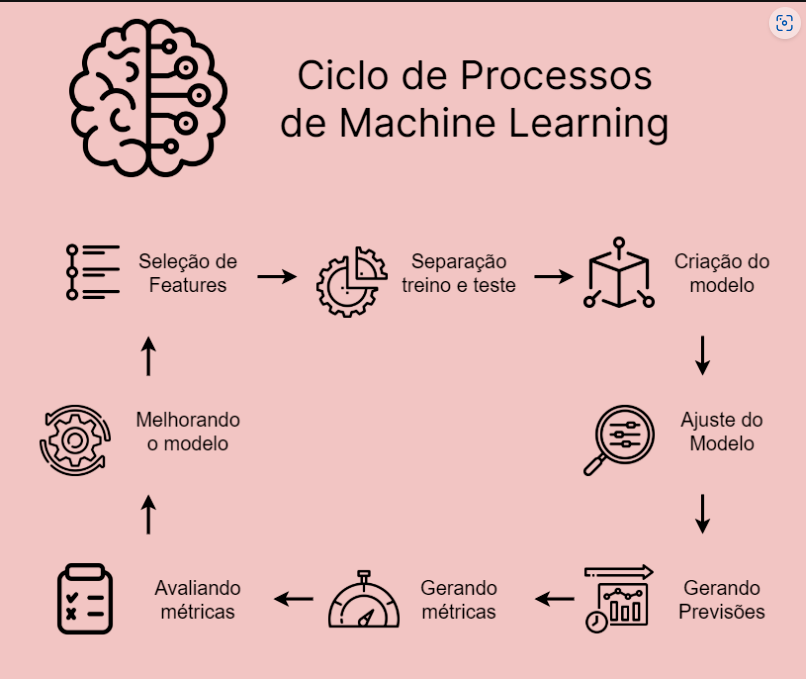

Seleção de características: há a identificação dos dados que serão utilizados para treinamento do modelo;
Separação treino e teste: é feita a definição da porcentagem de dados para utilização no treinamento e avaliação do modelo de machine learning;
Criação do modelo: trabalhada a escolha do tipo de algoritmo e treinamento do modelo a partir dos dado;
Ajuste do modelo: é realizado o ajuste de parâmetros do modelo para que ele desenvolva um bom aprendizado com base nos dados disponíveis;
Gerando previsões: é feita a testagem do modelo com as informações não utilizadas no treinamento;
Gerando métricas: é elaborado o cálculo das métricas que melhor representem como a máquina pode performar em uma situação real ou desejável;
Avaliando métricas: verifica se o modelo está suficientemente capacitado e compreende se a máquina foi capaz de aprender e não só memorizar as respostas do treinamento, bem como debater quais podem ter sido as causas para o sucesso ou não das previsões;
Melhorando o modelo: aprimoramento dos parâmetros do modelo, com o objetivo de melhorar a qualidade e a eficiência do aprendizado, de modo que os novos valores permitam também a melhoria dos valores obtidos na etapa 6;
Volta ao passo 1: o ciclo de desenvolvimento de um modelo de machine learning é iniciado novamente. O ciclo só acaba quando é obtido um modelo de alta performance que funciona bem na tarefa que ele é criado para realizar.


In [98]:
import pandas as pd
import numpy as np

### Analise Exploratoria dos Dados - Vamos comecar explorando os dados para avaliar como funciona e qual sao as suas respectivas estruturas


In [99]:
data = pd.read_json("https://raw.githubusercontent.com/alura-cursos/2570-regressao-com-sklearn/refs/heads/main/dados/imoveis.json",  orient='columns')

In [100]:
data.head(5)

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


In [101]:
data.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [102]:
data.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

### Para tratamento do JSON, vamos aplicar a funcao Normalize do Pandas, para que assim, os JSONs se torne um DataFrame


In [103]:
data_ident = pd.json_normalize(data.ident)

In [104]:
### Nesse caso, vamos usar um SEP para identificar de qual estrutura JSON esta vindo a informacao
data_listing = pd.json_normalize(data.listing, sep='_')

In [105]:
### Juncao dos Dataframes usando o PD.CONCAT
dataframe = pd.concat([data_ident, data_listing], axis=1)

In [106]:
dataframe.head(5)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [107]:
for i in dataframe.columns:
  print("========"*30)
  print(dataframe[i].value_counts())

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
source
Website    73615
Name: count, dtype: int64
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
address_location_lat

In [108]:
### Aplicacao de Filtros para Tratamento de Dados
### Os filtros sao para os seguintes casos:
### 1 - Casas Residenciais
### 2 - Empreendimentos Comerciais

In [109]:
filter = (dataframe.address_city == 'Rio de Janeiro') & (dataframe.types_usage == 'Residencial')
data_state = dataframe[filter].reset_index(drop=True)
data_state.head(5)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [110]:
data_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

### Vamos trocar os TIPOS das variaveis para que conseguimos usar em nosso modelo de maneira assertiva


In [111]:
data_state = data_state.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64'
})

data_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [112]:
data_state.address_zone.value_counts()

,count
address_zone,
Zona Oeste,35523
Zona Sul,18535
Zona Norte,14379
Zona Central,1002
,149


### Vamos fazer a substituicao de valores vazios como encontramos acima para valores Nulos como np.nan

In [113]:
data_state['address_zone'] = data_state.address_zone.replace('', np.nan)

In [114]:
data_state.address_zone.isnull().sum()

149

### Preenchimento de valores nulos


In [115]:
 dici = data_state[~data_state['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [116]:
dic_zones = {}
for i in dici:
  dic_zones[i['address_neighborhood']] = i['address_zone']

In [117]:
for neighborhood, zone in dic_zones.items():
  data_state.loc[data_state['address_neighborhood'] == neighborhood, 'address_zone'] = zone

In [118]:
data_state['address_zone'].isnull().sum()

0

In [119]:
data_state.prices_tax_iptu.isnull().sum()

8725

In [120]:
data_state.prices_tax_condo.isnull().sum()

6061

In [121]:
data_state.prices_tax_condo.fillna(data_state.prices_tax_condo.mean(), inplace=True)

<ipython-input-121-a1bf593783da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_state.prices_tax_condo.fillna(data_state.prices_tax_condo.mean(), inplace=True)


In [122]:
data_state.prices_tax_iptu.fillna(data_state.prices_tax_iptu.mean(), inplace=True)

<ipython-input-122-10642205e9ca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_state.prices_tax_iptu.fillna(data_state.prices_tax_iptu.mean(), inplace=True)


In [123]:
print(f'O total de dados nulos em PRICE e de: {data_state.prices_price.isnull().sum()}')
print(f'O total de dados nulos em TAX IPTU e de: {data_state.prices_tax_iptu.isnull().sum()}')
print(f'O total de dados nulos em TAX IPTU e de: {data_state.prices_tax_condo.isnull().sum()}')

O total de dados nulos em PRICE e de: 0
O total de dados nulos em TAX IPTU e de: 0
O total de dados nulos em TAX IPTU e de: 0


### Vamos retirar e alterar o nome de colunas para a selacao de variaveis

In [124]:
# Nesse caso, descartamos variaveis que nao importa para nos, sendo assim, descartamos variaveis que nao fazem sentindo para treinamento do modelo e que provavelmente nao ira alterar o valor (VARIAVEL RESPOSTA)
# Por isso, fazemos essa selecao para que seja de acordo com o que estamos esperando
data_state.drop(['customerID', 'source','types_usage', 'address_city','address_location_lon','address_location_lat', 'address_neighborhood'], axis=1, inplace=True),

(None,)

In [125]:
# Renomeacao de colunas atraves de um dicionario
dicionario_colunas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

In [126]:
data_state = data_state.rename(columns=dicionario_colunas)

In [127]:
data_state.head(5)

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.000000,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.000000,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.000000,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.000000,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,4379.018846,0.0,0,0,0,0,200,200,0,0,0


### Vamos realizar a correlacao entre as variaveis agora

In [128]:
# Para realizar a correlacao, so podemos usar variaveis numericas e nao variaveis descritivas
data_corr = data_state.drop(['unit', 'zone'], axis=1)


In [129]:
correlacao = data_corr.corr()
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.028920,0.047136,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.028920,1.000000,0.226136,0.013028,0.014553,0.018769,0.009277,0.013970,-0.000179,0.005477,0.003883,0.000904
tax_condo,0.047136,0.226136,1.000000,0.018487,0.019718,0.023605,0.018032,0.019707,-0.000336,0.012151,-0.002053,0.002680
bedrooms,0.530474,0.013028,0.018487,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.014553,0.019718,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.018769,0.023605,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009277,0.018032,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.013970,0.019707,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000179,-0.000336,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.005477,0.012151,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

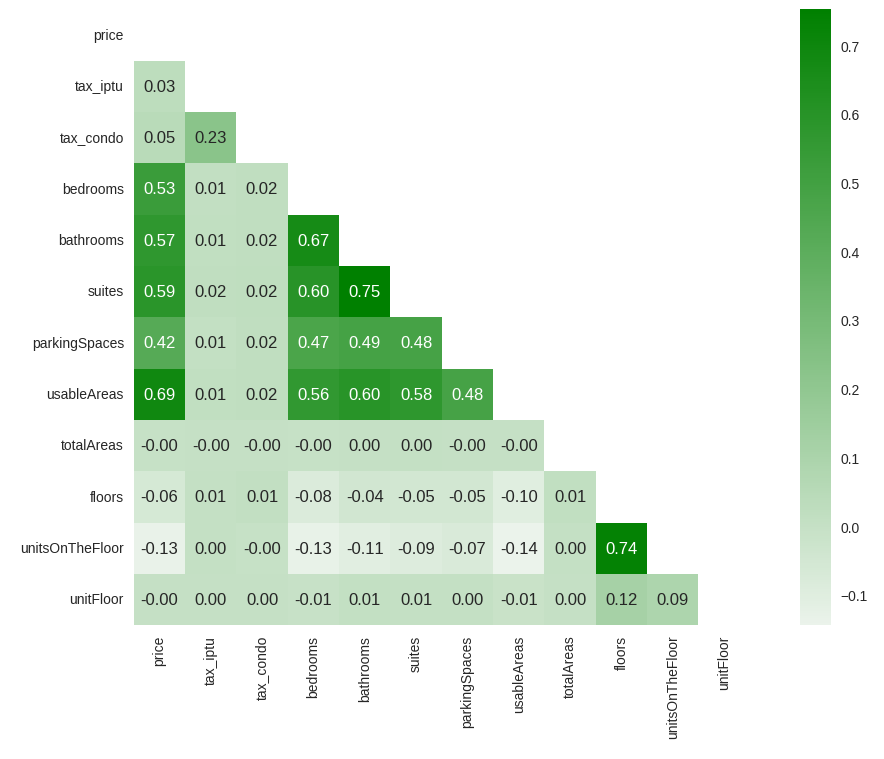

In [131]:
#visualização das correlações
cores = sns.color_palette('light:green', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

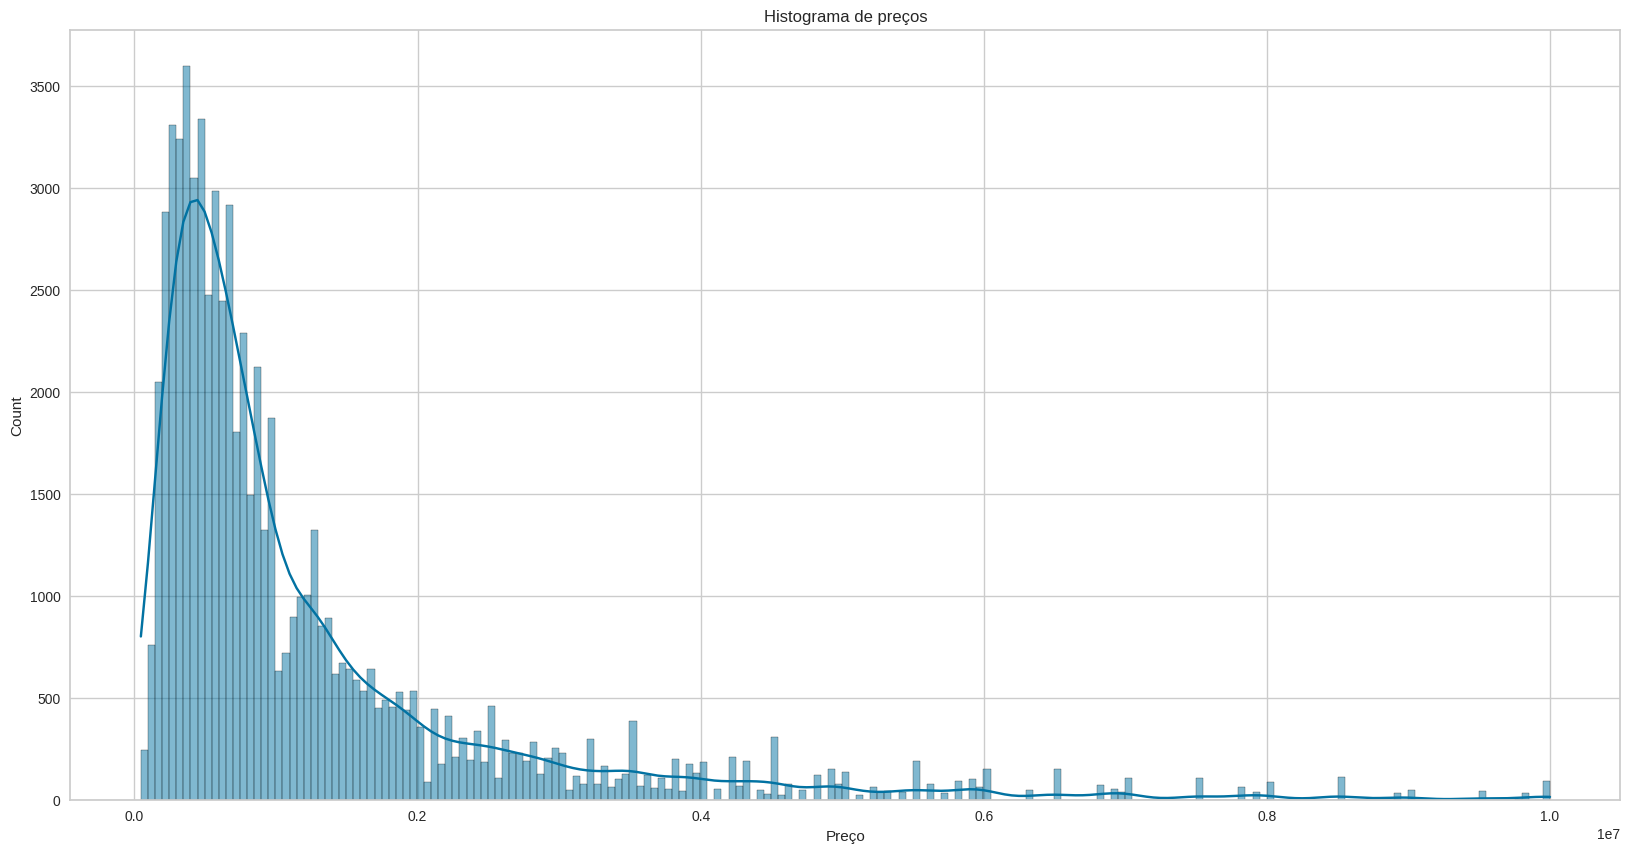

In [132]:
#antes (distrib. assimetrica a direita)
ax = sns.histplot(data=data_state, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

### Aplicando transformacao de dados para nao causar assimetria, pois, com a assimetria, pode causar confusao no modelo



In [133]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(data_state.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [134]:
colunas_dados_tranformados = data_state.select_dtypes(exclude=['object']).columns
df_transformado = pd.concat([data_state.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,8.384808,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


In [135]:
nw_df = pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)

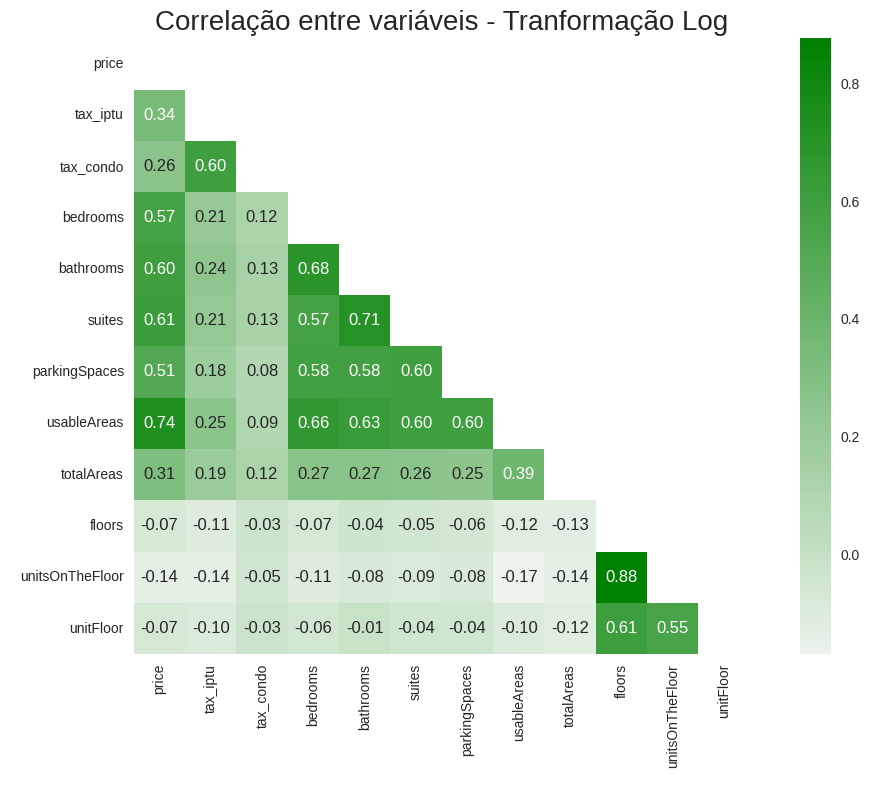

In [136]:

#depois da transformação
correlacao_transformado = nw_df.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)

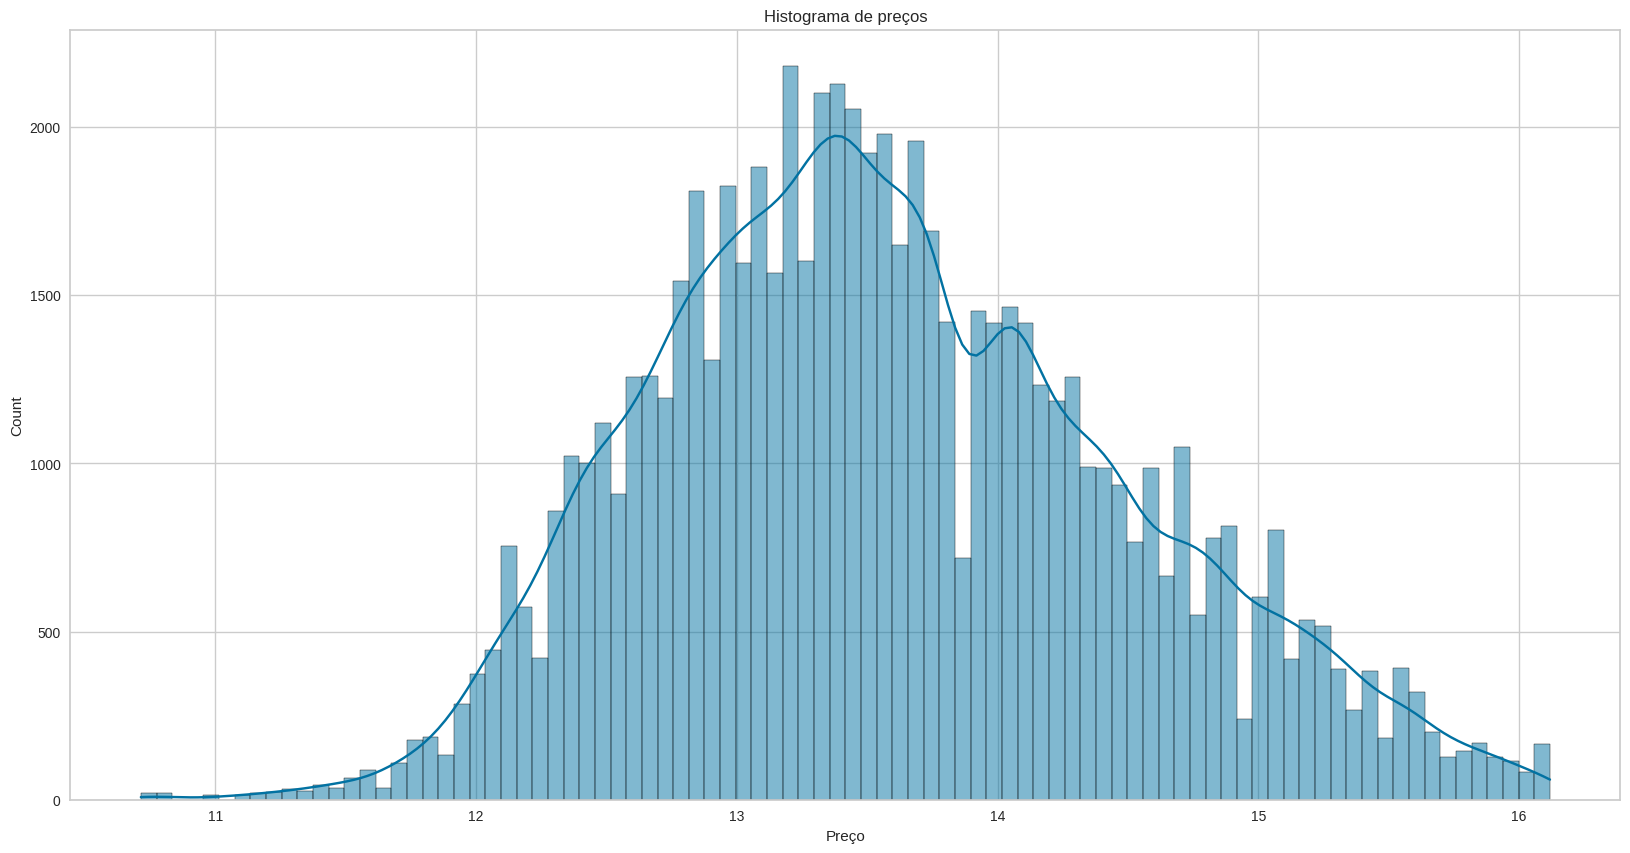

In [137]:
#antes (distrib. assimetrica a direita)
ax = sns.histplot(data=nw_df, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

### Para as variaveis categoricas, vamos criar variaveis Dummies

In [138]:
varaiveis_categoricas = df_transformado.select_dtypes(include=['object']).columns
varaiveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [139]:
df_transformado = pd.get_dummies(df_transformado, columns=varaiveis_categoricas, drop_first=True)

In [140]:
df_transformado

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Casa,unit_Outros,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,True,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,True,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,False,False,False,True,False
4,10.819798,8.384808,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000,True,False,False,True,False
69584,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000,True,False,False,True,False
69585,16.118096,8.384808,8.193423,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000,False,False,False,False,True
69586,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294,True,False,False,True,False


### Criacao de modelo regressivo (Previsao) - Definicao de variaveis


In [141]:
# o X representa o conjunto de observacoes completo
X = df_transformado.drop('price', axis=1)
# o Y representa a nossa variavel de sucesso, ou seja, o nosso target
y = df_transformado.price

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
# Instacia o modelo
lr = LinearRegression()

In [146]:
# Treino
lr.fit(X_treino, Y_treino)

LinearRegression()

In [147]:
# Teste
lr.predict(X_teste)

array([13.2536179 , 12.48715476, 12.92961028, ..., 13.07605611,
       12.52224243, 14.47946425])

In [148]:
lr.score(X_teste, Y_teste)

0.7869657991457165

### Coeficiente de Determinacao R2

In [149]:
from sklearn.metrics import r2_score

In [150]:
r2_lr = r2_score(Y_teste, lr.predict(X_teste))

In [151]:
r2_lr

0.7869657991457165

### Aprendendo o DecisionTreeRegressor


In [152]:
from sklearn.tree import DecisionTreeRegressor

In [153]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [154]:
dtr.fit(X_treino, Y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [155]:
previsao_dtr = dtr.predict(X_teste)
previsao_dtr

array([13.41974163, 12.25493804, 12.88852168, ..., 13.14776119,
       12.25493804, 14.56328813])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


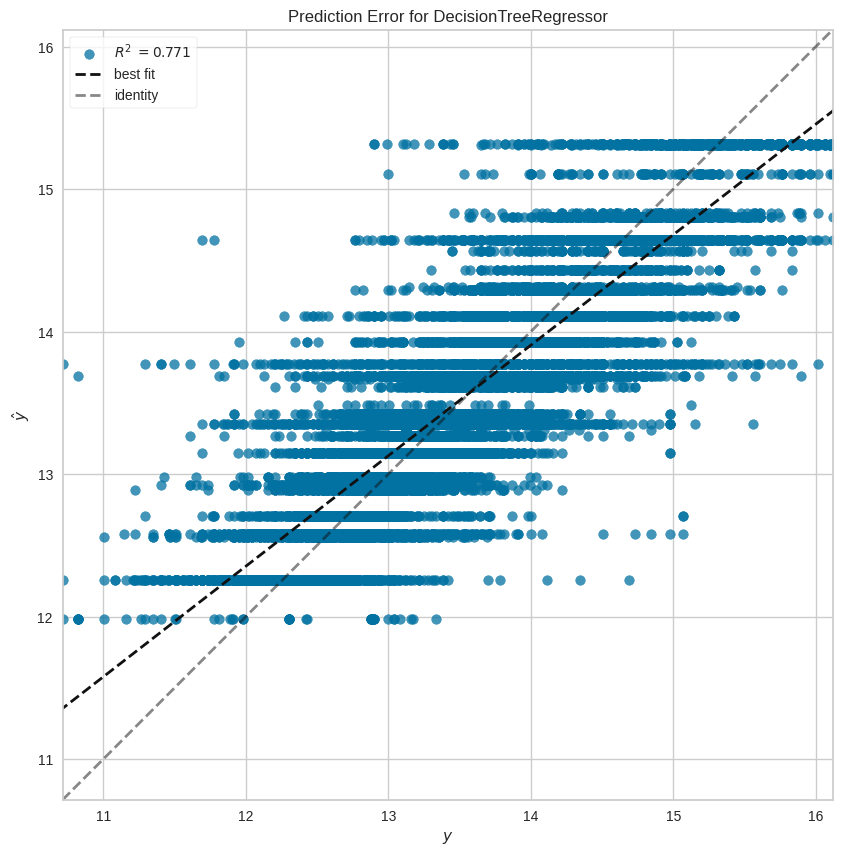

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [156]:

from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_treino, Y_treino)
pev.score(X_teste, Y_teste)
pev.poof()

In [157]:
r2_dtr = r2_score(Y_teste, previsao_dtr)
r2_dtr

0.7706691642756535

Metodo Ensemble - Esse modelo eh combinado para realizar a predicao da melhor maneira

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rf = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=5)

In [160]:
rf.fit(X_treino, Y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [161]:
previsao_rf = rf.predict(X_teste)
previsao_rf

array([13.43305433, 12.26131502, 13.12072305, ..., 13.15575685,
       12.26131502, 14.67073215])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


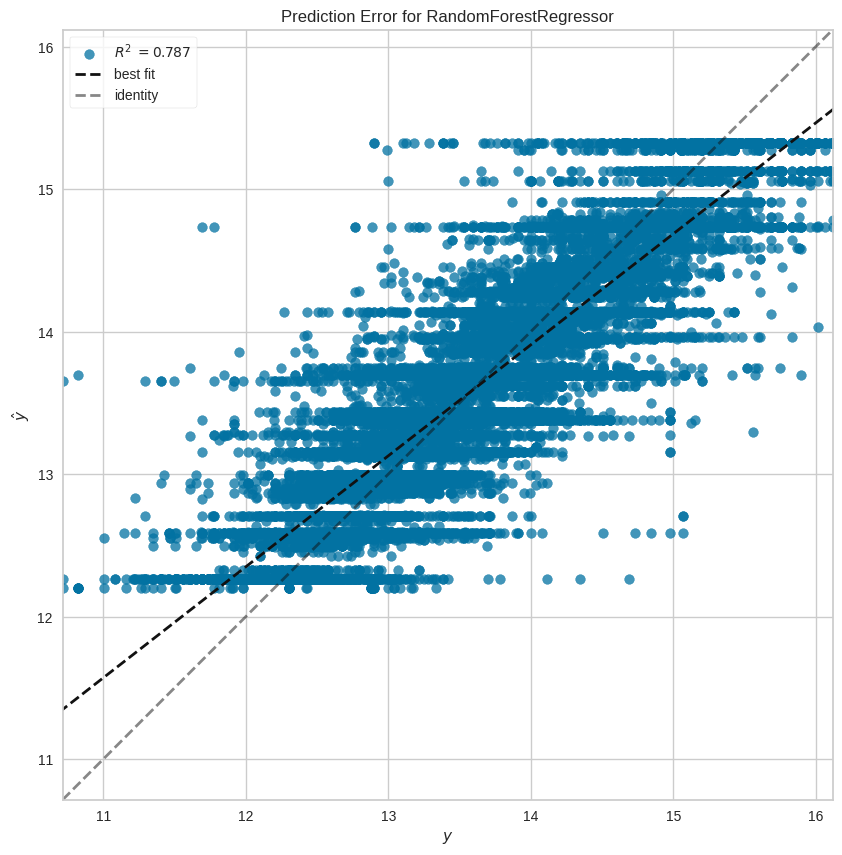

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [162]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf)
pev.fit(X_treino, Y_treino)
pev.score(X_teste, Y_teste)
pev.poof()

In [163]:
#coeficiente de determinacao
r2_rf = r2_score(Y_teste, previsao_rf)
r2_rf

0.7874492695776288

In [164]:
# Dica

# início do código

# Importando os métodos que serão utilizados
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def obter_metrica(modelo, X_teste, y_teste, nome):
    predict = modelo.predict(X_teste)
    df_metricas = pd.DataFrame({
        'R2': [r2_score(y_teste,predict)],
        'MSE': [mean_squared_error(y_teste, predict)],
        'MAE': [mean_absolute_error(y_teste, predict)]
    }, index=[nome])

    return df_metricas



def tabela_metricas(modelo_reg_linear, modelo_dt, modelo_rf, X_teste, y_teste):
    df_metricas_reg_linear = obter_metrica(modelo_reg_linear, X_teste, Y_teste, 'Linear Regression')
    df_metricas_dt = obter_metrica(modelo_dt, X_teste, Y_teste, 'Decision Tree Regression')
    df_metricas_rf = obter_metrica(modelo_rf, X_teste, Y_teste, 'Random Forest Regression')

    return pd.concat([df_metricas_reg_linear, df_metricas_dt, df_metricas_rf])

tabela_metricas(lr, dtr, rf, X_teste, Y_teste)

,R2,MSE,MAE
Linear Regression,0.786966,0.174415,0.312255
Decision Tree Regression,0.770669,0.187757,0.320165
Random Forest Regression,0.787449,0.174019,0.308130


5.1 - Ferramentas de Otimização
Por que otimizar?

Quais ferramentas temos?

Melhorando os hiperparâmetros - Documentação Sklearn

1. Cross Validation (Validação Cruzada)
Documentação Cross-validation

Cross Validation é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.

Os dados particionados são os de treino (70% dos dados originais)!

K-fold: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.

2. Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)
Documentação Randomized Search

Artigo Científico sobre Random Search

"Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."

Imagem no artigo sobre funcionamento desta busca

In [165]:
#divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#definindo o K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

In [166]:
desempenho_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = X_treino,
                                       y = Y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.775


In [167]:
#seleção de hiperparâmetros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [168]:
from sklearn.model_selection import RandomizedSearchCV

In [169]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [170]:
randomcv_dtr = random_cv_dt.fit(X_treino, Y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

In [171]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020789,0.005803,0.000000,0.000000,16,10,auto,12,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,0.021847,0.007820,0.000000,0.000000,12,8,auto,14,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,26.136476,2.647609,0.010783,0.005628,16,10,sqrt,10,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.801183,0.814742,0.812911,0.812821,0.812834,0.810898,0.004912,1
3,0.010463,0.004532,0.000000,0.000000,16,10,auto,8,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,0.015557,0.002338,0.000000,0.000000,8,8,auto,6,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [172]:
randomcv_dtr.best_params_

{'min_samples_split': 16,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [173]:
randomcv_dtr.best_score_

0.810898256644014

DTR Otimizado - Apos realizar o Cross Validation

In [174]:
dtr_otimizado = DecisionTreeRegressor(criterion='squared_error' , max_depth=14,
                            min_samples_leaf= 10, min_samples_split =12 )

In [175]:
dtr_otimizado.fit(X_treino, Y_treino)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=12)

In [176]:
predicao_dtr_otimizado = dtr_otimizado.predict(X_teste)

In [177]:
r2_score(Y_teste, predicao_dtr_otimizado)

0.8605749622063212

Realizando o Cross Validation no Random Forest e aplicando com as metricas obtidas

In [178]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_treino,
                                       y = Y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenhoRF_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.794


In [179]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}


In [180]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [182]:
rf_randomcv = random_cv_rf.fit(X_treino, Y_treino)

In [183]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,68.193960,9.897238,0.974261,0.128486,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.895349,0.888854,0.889458,0.889776,0.895522,0.891792,0.002990,2
1,61.507270,0.279445,0.742410,0.025273,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.895447,0.888952,0.889542,0.889802,0.895549,0.891858,0.002985,1
2,45.220363,0.221704,0.560425,0.036915,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.895077,0.888818,0.889507,0.889523,0.895496,0.891684,0.002955,3
3,59.410935,1.397221,0.871677,0.233402,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.895091,0.888737,0.889169,0.889557,0.895286,0.891568,0.002968,4
4,42.521665,4.215369,0.481233,0.062746,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.894749,0.888554,0.889166,0.889244,0.895142,0.891371,0.002931,5


In [184]:
# Mostrando quais foram os melhores parametros obtidos no teste
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [185]:
rf_randomcv.best_score_

0.8918584091564423

### Criacao do modelo de acordo com o resultado obtido dos parametros no teste

In [186]:
rf_otimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [188]:
rf_otimizado2.fit(X_treino, Y_treino)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [189]:
predicao_rf_otimizado2 = rf_otimizado2.predict(X_teste)

In [190]:
r2_score(Y_teste, predicao_rf_otimizado2)

0.8945443453974856

###  Escolhendo o melhor modelo de acordo com as metricas obtidas

In [191]:
#tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % r2_score(Y_teste, predicao_dtr_otimizado))
print("Floresta Aleatória: %f" % r2_score(Y_teste, predicao_rf_otimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(desempenho_cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(desempenhoRF_cross_val_r2.mean(),3))

Random Search
Árvore de Decisão: 0.860575
Floresta Aleatória: 0.894544
******************************
Cross Validation
Árvore de Decisão: 0.775000
Floresta Aleatória: 0.794000


In [193]:
#Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [196]:
# Get missing columns from training data
missing_cols = set(rf_otimizado2.feature_names_in_) - set(cliente_joana.columns)

# Add missing columns to cliente_joana and fill with 0
for col in missing_cols:
    cliente_joana[col] = 0

# Reorder columns to match training data
cliente_joana = cliente_joana[rf_otimizado2.feature_names_in_]

#Verificando resultados
predicao_cliente_joana = rf_otimizado2.predict(cliente_joana)
np.expm1(predicao_cliente_joana)

array([278012.02651811])